In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
from collections import Counter
from collections import OrderedDict
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer

In [3]:
# Data Preprocessing 
# Remove stopwords
stopword = set(stopwords.words('english'))
unrelevent = {'we', 'We','have','has','for', 'from', 'they','there','while','the', 'is','both','with','and', 'were', 'but','any','who','ah','80x5', 'e4', 'tff','55pm', }
#ab = stopword
#unrelevent.append(ab)
#print(unrelevent)
for i in unrelevent:
    stopword.add(i)
print(len(stopword))
#x_train = data['Brief Description']

185


In [4]:
token_pattern=u'(?ui)\\b\\w*[a-zA-Z][0-9]+\\w*\\b',

In [5]:
#vect = TfidfVectorizer(analyzer='word',stop_words = stopword).fit(x_train)

In [6]:
"""for i in range(len(data)):
    #print(data.iloc[i:i+1,0])
    a = data['Brief Description'][0]
    #data.iloc[i:i+1,0] = sent_tokenize(data.iloc[i:i+1,0])"""

"for i in range(len(data)):\n    #print(data.iloc[i:i+1,0])\n    a = data['Brief Description'][0]\n    #data.iloc[i:i+1,0] = sent_tokenize(data.iloc[i:i+1,0])"

In [7]:
from nltk.stem.wordnet import WordNetLemmatizer

## Concept map for Data for Praveen_csv

In [8]:
data = pd.read_csv(r'F:\Winter pack\Introduction to Game Development\Project on DA\Projects\Project_3(Concept Map)\Data\Data for Praveen_csv.csv')

In [9]:
data.head()

,Brief Description,Investigation Report,Hazardous Element
0,When the process Fan#61 tipped at around 10:30...,time delay between interlock systems. Despite ...,Gas
1,Huge skirt leakage in vessel #1 after jam fell...,Prior to breakdown on 10th Apr’15 there were e...,Hot metal/ steel/slag
2,Ladle # 9 Slide gate failed to operate. There ...,malfunction of equipment/machine,Hot metal/ steel/slag
3,GCM Regulator link came out of its actuator re...,"malfunction of equipment, the actuator to be i...",chemical
4,While opening slide gate of ladle 23 in Caster...,"deformation of plate fixing casstte ,improper ...",Hot metal/ steel/slag


In [9]:
hot_metal_data=pd.DataFrame()
brief_dis = []
Invest_rep = []
for i in range(len(data)):
    if data['Hazardous Element'][i]=='Hot metal/ steel/slag':
        brief_dis.append(data['Brief Description'][i])
    if data['Hazardous Element'][i]=='Hot metal/ steel/slag':
        Invest_rep.append(data['Investigation Report'][i])
hot_metal_data['Brief Description'] = brief_dis
hot_metal_data['Investigation Report'] = Invest_rep

In [14]:
stopword = set(stopwords.words('english'))
unrelevent = {'we', 'We','have','has','for', 'from', 'they','there','while','the', 'is','both','with','and', 'were', 'but','any','who','ah','80x5', 'e4', 'tff','55pm','pm'}
for i in unrelevent:
    stopword.add(i)
print(len(stopword))
x_train = hot_metal_data['Brief Description']

186


In [15]:
vect = TfidfVectorizer(analyzer='word',token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b',stop_words = stopword).fit(x_train)

In [41]:
print(vect.get_feature_names())

['00hrs', '100ltr', '100t', '10hrs', '10pm', '19th', '202t', '20hrs', '20min', '240bar', '25am', '25pm', '25t', '27t', '2nd', '30pm', '37pm', '40t', '50pm', 'adding', 'addition', 'agency', 'al80', 'also', 'appeared', 'approx', 'area', 'arm', 'around', 'asked', 'away', 'b', 'back', 'backup', 'bars', 'bay', 'blank', 'blow', 'bottom', 'brigade', 'bring', 'brought', 'c', 'cable', 'calcium', 'called', 'cap', 'car', 'cast', 'caster', 'casting', 'cc', 'cc2', 'cc3', 'chunk', 'chute', 'circuit', 'clay', 'close', 'closed', 'closing', 'cnc', 'cold', 'coming', 'complete', 'completely', 'completion', 'conditions', 'contaminations', 'control', 'cooled', 'copper', 'cordened', 'could', 'coupled', 'cover', 'crane', 'crew', 'damage', 'damaged', 'de', 'defence', 'destination', 'difficulty', 'discharged', 'diverted', 'done', 'drag', 'drained', 'drastically', 'due', 'dump', 'dumped', 'dumping', 'east', 'ejected', 'emegency', 'emergency', 'emptied', 'emptying', 'end', 'externally', 'failed', 'fall', 'fallin

#### Upload data

In [10]:
data = pd.read_csv(r'F:\Winter pack\Introduction to Game Development\Project on DA\Projects\Project_3(Concept Map)\Data\Hot Metal data for Praveen.csv')
data['investigation Report'] = data['Investigation Report'].fillna("Nan", inplace = True)

In [11]:
data.head()

,Brief Description,Investigation Report,Hazardous Element,Initiating mechanism,Accident/ incident,investigation Report
0,Cast House #2 Main Trough puncher and hot meta...,Metal have passed through the gap between ACCM...,Hot metal/ steel/slag,failure/malfunctioning of equipment,spillage of hazardous material,None
1,After purging of H.No. T39845 when purging lan...,An investigation was carried out with cross fu...,Hot metal/ steel/slag,failure/malfunctioning of equipment,spillage of hazardous material,None
2,"During Tapping from tap hole no #1, slag was d...",improper work by operator (clay intrapped with...,Hot metal/ steel/slag,improper work by operator/worker,Explosion,None
3,Huge skirt leakage in vessel #1 after jam fell...,Prior to breakdown on 10th Apr’15 there were e...,Hot metal/ steel/slag,presence of unwanted/flammable material,Leakage of hazardous material,None
4,Ladle # 9 Slide gate failed to operate. There ...,malfunction of equipment/machine,Hot metal/ steel/slag,failure/malfunctioning of equipment,Leakage of hazardous material,None


#### Clean data by hand

In [12]:
'''for i in range(len(data)):
    data['Brief Description'][i] = word_tokenize(data['Brief Description'][i])
    data['Investigation Report'][i] = word_tokenize(data['Investigation Report'][i])'''

"for i in range(len(data)):\n    data['Brief Description'][i] = word_tokenize(data['Brief Description'][i])\n    data['Investigation Report'][i] = word_tokenize(data['Investigation Report'][i])"

In [13]:
"""for i in range(len(data)):
    a = data['Brief Description'][i]
    for j in a:
        if j.isalpha():
            print(j)"""

"for i in range(len(data)):\n    a = data['Brief Description'][i]\n    for j in a:\n        if j.isalpha():\n            print(j)"

##### Token Pattern for avoid alphanumeric is  r'\b[^\d\W]+\b'

## TFIDF of Brief Description

In [14]:
vect = TfidfVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b',stop_words = stopword).fit(data['Brief Description'])

In [16]:
len(vect.get_feature_names())

1496

In [2]:
'''count = 0
for key,item in vect.vocabulary_.items():
    if item > 500:
        #print(key, item)
        count += 1'''

'count = 0\nfor key,item in vect.vocabulary_.items():\n    if item > 500:\n        #print(key, item)\n        count += 1'

In [19]:
vector =  vect.fit_transform(data['Brief Description'])

In [20]:
count

995

In [21]:
print(vector.shape)

(251, 1496)


In [22]:
print(vector[:,21])

  (182, 0)	0.2007368911268843


In [23]:
a = []
for key, item in vect.vocabulary_.items():
    a.append(key)

In [24]:
frame = pd.DataFrame(vector.toarray(), columns=a)

In [25]:
v = vector.toarray()

In [26]:
frame.iloc[17,168]

0.12230228138998314

In [27]:
f = pd.DataFrame(index = a, )

In [28]:
feature_names = vect.get_feature_names()
#this gives you the list of all the tokens or n-grams or words. For the first document in your corpus,
doc = vector.shape[0]

outer_dict ={}
for i in range(doc):
    feature_index = vector[i,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [vector[i, x] for x in feature_index])
    inner_dict = {}
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
        if len(w)>2:
            inner_dict[w] = s
    outer_dict[i] = inner_dict.items()

In [29]:
vector.shape[0]

251

In [ ]:
count = 0
for key,value in outer_dict.items():
    a = dict(value)
    for k,v in a.items()
        count += 1

In [42]:
outer_dict[0]

dict_items([('cast', 0.21922392668811808), ('house', 0.2774848262609255), ('main', 0.34018793323881513), ('trough', 0.2815126508397807), ('puncher', 0.4582961573170558), ('hot', 0.1706136479242957), ('metal', 0.12192596613464647), ('spilled', 0.3054928558291512), ('railway', 0.4582961573170558), ('track', 0.2270830166359552), ('line', 0.2665099689543565)])

In [43]:
outer_dict[230]

dict_items([('trough', 0.5265775167579596), ('slag', 0.1070110142238576), ('damage', 0.1583209354139735), ('taken', 0.1683479396732058), ('observed', 0.1620890493839614), ('near', 0.1809715925537892), ('dam', 0.2244151260005875), ('happened', 0.1809715925537892), ('property', 0.21211044048587635), ('discharged', 0.2408892500068217), ('service', 0.25181465227018934), ('incident', 0.20228533885295213), ('immediatly', 0.25181465227018934), ('temprature', 0.2857520514499357), ('rised', 0.2857520514499357), ('abnormaly', 0.2857520514499357)])

# For Investigation Report
## TFIDF of Investigation Report

In [31]:
vect_invest_repo = TfidfVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b',stop_words = stopword).fit(data['Investigation Report'])

In [32]:
vector_invest_rep =  vect_invest_repo.fit_transform(data['Investigation Report'])

In [33]:
feature_names = vect_invest_repo.get_feature_names()
#this gives you the list of all the tokens or n-grams or words. For the first document in your corpus,
doc_1 = vector_invest_rep.shape[0]

outer_dict_invest_rep ={}
for i in range(doc_1):
    feature_index = vector_invest_rep[i,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [vector_invest_rep[i, x] for x in feature_index])
    inner_dict = {}
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
        if len(w)>2:
            inner_dict[w] = s
    outer_dict_invest_rep[i] = inner_dict.items()

In [34]:
outer_dict_invest_rep[2]

dict_items([('metal', 0.2649211806261284), ('improper', 0.3151407824083403), ('work', 0.2963993434672576), ('operator', 0.25694405902244744), ('clay', 0.5816486203215671), ('intrapped', 0.5816486203215671)])

In [35]:
# brief discription and investigation Report for different Initiating mechanism
initia_mec = data['Initiating mechanism'].unique().tolist()

In [36]:
# find index of brief discription and investigation Report for different initiation mechanism
initiation_mec = {}
for j in initia_mec:
    a = []
    for i in range(len(data)):
        if data['Initiating mechanism'][i] == j:
            a.append(i)
    initiation_mec[j] = a

In [38]:
# Accident/incident 
accident_feature = data['Accident/ incident'].unique().tolist()

In [39]:
accident_feature

['spillage of hazardous material',
 'Explosion',
 'Leakage of hazardous material',
 'degradation/breaking of equiptment',
 'Fire/ flame generation',
 'Overflow of hazardous material',
 'dashing/collision',
 'splash',
 'derailment',
 'Splash',
 'Disturbance in process parameters/equipment shutdown',
 'exposure to toxic gas/ high temperature',
 'water logging/flooding situation',
 'fall of material',
 'explosion']

In [40]:
# initiating mechanism that relate to accident feature
acc_index = {}
for j in accident_feature:
    a ={}
    for i in range(len(data)):
        if data['Accident/ incident'][i] == j:
            b = data['Initiating mechanism'][i]
            a[b] = initiation_mec[b]
    acc_index[j] = a

In [64]:
# we try n_gram, max_df, min_df

In [65]:
vect_min = TfidfVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b',stop_words = stopword, max_df = 0.01).fit(data['Brief Description'])

In [67]:
print(len(vect_min.vocabulary_))

1037


In [41]:
from nltk.cluster import em
from nltk.cluster import KMeansClusterer
from sklearn import cluster

In [42]:
from gensim.models import Word2Vec

F:\Anaconda\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Working with only brief description

In [39]:
"""brief_d = []
for key, item in outer_dict.items():
    b =[]
    for i, j in dict(item).items():
        b.append(i)
    brief_d.append(b)"""

'brief_d = []\nfor key, item in outer_dict.items():\n    b =[]\n    for i, j in dict(item).items():\n        b.append(i)\n    brief_d.append(b)'

In [ ]:
vect.vocabulary_

In [41]:
brief_d = []
for key, item in vect.vocabulary_.items():
    brief_d.append(key)

In [42]:
model = Word2Vec([brief_d], min_count=1)

In [43]:
def word_vectoriz(sent, model):
    a = model[sent]
    return np.asarray(a);

In [44]:
X = []
for j in brief_d:
    X.append(word_vectoriz(j, model))

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [45]:
NUM_CLUSTERS=12
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(assigned_clusters)

In [46]:
len(assigned_clusters)

1496

In [47]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # calculate within cluster sum of square 

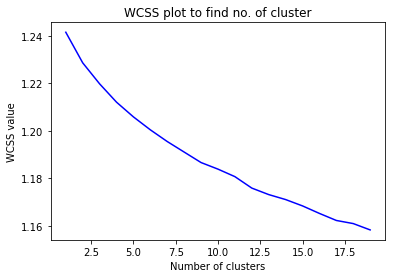

In [48]:
plt.plot(range(1,20), wcss, color = 'b')
plt.title('WCSS plot to find no. of cluster')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS value')
plt.show()

In [49]:
kmeans = KMeans(n_clusters = 12, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = kmeans.fit_predict(X)

In [50]:
y_means

array([11,  3, 10, ...,  0,  9, 11])

In [ ]:
'''count = 0
print("Top terms per cluster:")
print()
k = []
sorted_index_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(10):    
    print("Cluster %d words:" % i, end='')     
#    for ind in sorted_index_centroids[i, :]:
    for key, item in clust_brief.items():
        if item == i:
            print(' %s' % key, end=',')
    print()
    print()'''

In [159]:
terms = vect.get_feature_names()
order_centroids = kmeans.cluster_centers_.argsort()[:,::-1]
for i in range(12):
    print( "Cluster %d words: " % i)
    top_words = [str(terms[term_index]) for term_index in order_centroids[i, :]]
    print( "Top words: %s" % ','.join(top_words))
    

Cluster 0 words: 
Top words: aborted,bag,aside,able,arm,attended,appears,action,around,bar,back,besides,barrier,avoided,approximately,bale,become,badly,ashok,agency,assigned,backside,accept,abnormal,abdur,appeared,accurate,amount,arrest,area,bend,auto,averted,beside,anybody,awdesh,applying,aspect,arcing,activity,areas,applied,alll,apart,bay,aid,assist,asst,bags,automatically,battery,away,beam,al,bars,approx,alam,addition,angle,adding,argon,auxilary,accidentally,beneath,belt,air,abort,asked,bal,bell,available,avoid,aisle,bath,accumulated,adjacent,bed,affected,ankle,base,august,along,also,backup,activated,admitted,aluminium,abnormalities,alerted,b,accumulation,batteries,amiad,added,although,abnormaly,backwashing,backfire,another,became
Cluster 1 words: 
Top words: alll,asked,auto,activated,aluminium,available,abort,although,backfire,aborted,belt,accumulated,badly,auxilary,accumulation,accidentally,ankle,base,bay,attended,approx,apart,addition,another,bag,backup,beam,arrest,aisle,automati

In [ ]:
count = 0
words = list(model.wv.vocab)
for i, word in enumerate(words):  
   # print (word + ":" + str(assigned_clusters[i]))
    count += 1

In [51]:
# LDA
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PRAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [53]:
# LSA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

In [54]:
# raw documents to tf-idf matrix: 
vectorizer = TfidfVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b',stop_words = stopword, 
                             use_idf=True, 
                             smooth_idf=True)
# SVD to reduce dimensionality: 
svd_model = TruncatedSVD(n_components=600,algorithm='randomized',n_iter=10)

In [55]:
# pipeline of tf-idf + SVD, fit to and applied to documents:
svd_transformer = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])

In [56]:
stopword = set(stopwords.words('english'))
unrelevent = {'we', 'We','have','has','for', 'from', 'they','there','while','the', 'is','both','with','and', 'were', 'but','any','who','ah','80x5', 'e4', 'tff','55pm','pm'}
for i in unrelevent:
    stopword.add(i)
print(len(stopword))
x_train = data['Brief Description']

186


In [98]:
svd_matrix = svd_transformer.fit_transform(x_train)

## LDA approach on Brief Description

In [213]:
#from gensim.corpora.Dictionary import doc2bow
from gensim.corpora import MmCorpus
from gensim.models.ldamodel import LdaModel

In [214]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
from nltk import PorterStemmer

In [216]:
#documents = data_copy

In [217]:
#documents_w = documents.str.split()

In [218]:
proceed_data = []
for k,v in outer_dict.items():
    proceed_data.append(v)

In [219]:
k = 0
two = []
while(k<len(proceed_data)):
    one = []
    for i,j in dict(proceed_data[k]).items():
        one.append(i)
    two.append(one)
    k += 1    

In [220]:
processed_docs = two

In [221]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [222]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [223]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]

In [224]:
dictionary.doc2bow(processed_docs[1])

[(6, 1), (7, 1)]

In [225]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3431722564134677),
 (1, 0.223805356610678),
 (2, 0.4888469203216999),
 (3, 0.46108005893358),
 (4, 0.362615067591124),
 (5, 0.49908731228326886)]


In [226]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.131*"hot" + 0.130*"pit" + 0.114*"torpedo" + 0.062*"ladle" + 0.045*"casting" + 0.043*"steel" + 0.038*"placed" + 0.034*"car" + 0.034*"track" + 0.031*"tilting"
Topic: 1 
Words: 0.053*"spillage" + 0.052*"ladle" + 0.052*"hot" + 0.052*"car" + 0.049*"injury" + 0.045*"pit" + 0.041*"due" + 0.040*"operator" + 0.040*"got" + 0.037*"crane"
Topic: 2 
Words: 0.129*"slag" + 0.062*"ladle" + 0.057*"hot" + 0.043*"charging" + 0.043*"car" + 0.035*"steel" + 0.034*"tapping" + 0.032*"got" + 0.032*"vessel" + 0.031*"runner"
Topic: 3 
Words: 0.092*"hot" + 0.082*"slag" + 0.066*"track" + 0.051*"cast" + 0.046*"line" + 0.043*"vessel" + 0.038*"trough" + 0.034*"closed" + 0.033*"house" + 0.032*"charging"
Topic: 4 
Words: 0.063*"ladle" + 0.053*"fire" + 0.041*"casting" + 0.036*"immediately" + 0.035*"turret" + 0.034*"slag" + 0.033*"around" + 0.033*"emergency" + 0.033*"caster" + 0.032*"area"
Topic: 5 
Words: 0.063*"cast" + 0.043*"got" + 0.041*"hot" + 0.040*"started" + 0.036*"closed" + 0.035*"stopped" + 0

In [69]:
brief_d_lda = {}
for idx, topic in lda_model.print_topics(-1):
    #print('Topic: {} \nWords: {}'.format(idx, topic))
    brief_d_lda[idx] = topic

In [70]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.059*"casting" + 0.058*"placed" + 0.047*"started" + 0.040*"pot" + 0.038*"track" + 0.034*"line" + 0.032*"stopped" + 0.031*"taken" + 0.030*"side" + 0.027*"pit"
Topic: 1 Word: 0.048*"closed" + 0.046*"trough" + 0.045*"due" + 0.039*"slag" + 0.038*"runner" + 0.035*"spillage" + 0.035*"hot" + 0.034*"tilting" + 0.033*"cast" + 0.031*"inside"
Topic: 2 Word: 0.102*"charging" + 0.076*"crane" + 0.072*"vessel" + 0.068*"started" + 0.043*"hot" + 0.042*"around" + 0.036*"torpedo" + 0.036*"flow" + 0.032*"opened" + 0.030*"tap"
Topic: 3 Word: 0.057*"line" + 0.053*"house" + 0.043*"slag" + 0.042*"track" + 0.041*"pot" + 0.040*"hot" + 0.038*"cast" + 0.035*"spillage" + 0.035*"got" + 0.032*"hole"
Topic: 4 Word: 0.082*"water" + 0.063*"inside" + 0.058*"damage" + 0.045*"could" + 0.042*"operator" + 0.042*"slag" + 0.040*"leakage" + 0.032*"crane" + 0.031*"runner" + 0.028*"fell"
Topic: 5 Word: 0.035*"emergency" + 0.034*"immediately" + 0.030*"heat" + 0.030*"got" + 0.030*"found" + 0.030*"tapping" + 0.029*"

In [144]:
brief_d_lda_tfidf = {}
for idx, topic in lda_model_tfidf.print_topics(-1):
    #print('Topic: {} \nWords: {}'.format(idx, topic))
    brief_d_lda_tfidf[idx] = topic

In [227]:
lda_model = gensim.models.LdaMulticore(num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.019*"line" + 0.019*"casting" + 0.018*"happened" + 0.018*"stopped" + 0.018*"started" + 0.018*"occurred" + 0.017*"house" + 0.017*"placed" + 0.017*"caster" + 0.017*"car"
Topic: 1 
Words: 0.018*"trough" + 0.018*"closed" + 0.018*"ladle" + 0.018*"inside" + 0.017*"flow" + 0.017*"injury" + 0.017*"steel" + 0.017*"line" + 0.017*"leakage" + 0.017*"placed"
Topic: 2 
Words: 0.019*"charging" + 0.018*"tundish" + 0.018*"around" + 0.018*"cast" + 0.018*"tap" + 0.018*"filled" + 0.017*"found" + 0.017*"fire" + 0.017*"observed" + 0.017*"emergency"
Topic: 3 
Words: 0.019*"damage" + 0.018*"spillage" + 0.018*"house" + 0.018*"turret" + 0.017*"ladle" + 0.017*"trough" + 0.017*"track" + 0.017*"tap" + 0.017*"immediately" + 0.017*"happened"
Topic: 4 
Words: 0.019*"opened" + 0.018*"flow" + 0.018*"could" + 0.018*"side" + 0.018*"fell" + 0.017*"bay" + 0.017*"track" + 0.017*"house" + 0.017*"caster" + 0.017*"immediately"
Topic: 5 
Words: 0.020*"found" + 0.019*"tilting" + 0.019*"steel" + 0.018*"gate" + 0

In [228]:
brief_d_lda_2 = {}
for idx, topic in lda_model.print_topics(-1):
    #print('Topic: {} \nWords: {}'.format(idx, topic))
    brief_d_lda_2[idx] = topic

## K_means on Brief Description

In [ ]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1] 

for i in range(12):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :20] #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

In [76]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

In [77]:
order_centroids.shape

(10, 100)

In [75]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = kmeans.fit_predict(X)

In [78]:
y_means

array([8, 2, 6, ..., 2, 2, 9])

In [ ]:
'''for i in range(12):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
'''

In [79]:
terms = vect.get_feature_names()
order_centroids = kmeans.cluster_centers_.argsort()[:,::-1]
brief_d_kmeans = {}
for i in range(10):
    print( "Cluster %d words: " % i)
    top_words = [str(terms[term_index]) for term_index in order_centroids[i, :20]]
    print( "Top words: %s" % ','.join(top_words))
    brief_d_kmeans[i] = top_words

Cluster 0 words: 
Top words: around,asst,b,awdesh,averted,aid,approximately,become,abnormaly,another,also,battery,beneath,accidentally,away,ankle,aspect,backfire,al,barrier
Cluster 1 words: 
Top words: aborted,approx,belt,accumulation,abnormal,bal,bars,bend,adding,arrest,argon,bar,angle,also,beam,aisle,appeared,applying,bale,another
Cluster 2 words: 
Top words: beam,available,ankle,avoid,action,bath,august,bell,aspect,accidentally,able,activity,angle,arm,amount,assist,around,beside,backside,asked
Cluster 3 words: 
Top words: avoided,batteries,abnormal,al,backup,besides,bay,base,bath,bar,agency,addition,b,appeared,backwashing,air,approximately,applying,abort,aid
Cluster 4 words: 
Top words: arrest,assigned,angle,apart,aside,area,ashok,bar,assist,along,agency,backside,besides,beside,backfire,battery,automatically,badly,base,awdesh
Cluster 5 words: 
Top words: aluminium,barrier,applied,alam,accumulated,backwashing,al,ankle,battery,activated,besides,abnormaly,avoid,abnormalities,back,bags,

# Work on investigation report

In [ ]:
vect_invest_repo.vocabulary_

In [80]:
invest_r = []
for key, item in vect_invest_repo.vocabulary_.items():
    invest_r.append(key)
print(len(invest_r))

1164


## K means on investigation report

In [81]:
model = Word2Vec([invest_r], min_count=1)

In [82]:
def word_vectoriz(sent, model):
    a = model[sent]
    return np.asarray(a);

In [83]:
Y = []
for j in invest_r:
    Y.append(word_vectoriz(j, model))

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [84]:
NUM_CLUSTERS=10
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance)
assigned_clusters_invest = kclusterer.cluster(Y, assign_clusters=True)
#print(assigned_clusters)

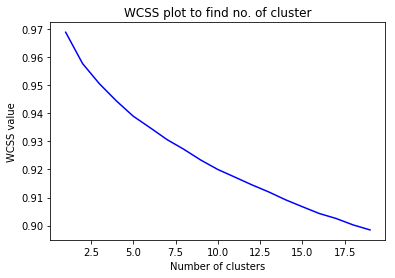

In [85]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,20):
    kmeans_invest = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
    kmeans_invest.fit(Y)
    wcss.append(kmeans_invest.inertia_) # calculate within cluster sum of square 

plt.plot(range(1,20), wcss, color = 'b')
plt.title('WCSS plot to find no. of cluster')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS value')
plt.show()

In [86]:
kmeans_invest = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = kmeans_invest.fit_predict(Y)

print(y_means)
'''
for i in range(12):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
'''

invest_kmeans = {}
terms = vect_invest_repo.get_feature_names()
order_centroids = kmeans_invest.cluster_centers_.argsort()[:,::-1]
for i in range(10):
    print( "Cluster %d words: " % i)
    top_words = [str(terms[term_index]) for term_index in order_centroids[i, :20]]
    print( "Top words: %s" % ','.join(top_words))
    invest_kmeans[i] = top_words
    
    

[7 7 0 ... 9 5 9]
Cluster 0 words: 
Top words: assumed,adequate,big,bag,attributed,board,accordingly,addition,adjusted,automatically,allignment,available,around,accepted,area,al,absence,availability,blocked,advance
Cluster 1 words: 
Top words: barrier,affected,bolt,appropriate,blocking,badly,adequate,additional,bar,accumulated,along,arrangement,alignment,blowpipe,already,adjusted,away,analyser,board,application
Cluster 2 words: 
Top words: activation,backup,amount,bleaching,badly,alumina,agency,apply,blocking,blot,analysis,adequate,blast,bolts,blocked,avoid,bags,arm,actuated,back
Cluster 3 words: 
Top words: better,adjusted,blot,asc,bleaching,activity,assurance,also,blown,accident,allignment,backsplash,accepted,blocked,auto,bed,attentive,additional,barrier,baf
Cluster 4 words: 
Top words: appropriate,april,arrangement,big,although,alarms,absence,baf,auto,badly,blowpipe,activity,accordingly,arrest,alley,accumulated,barrication,alumina,adding,blocked
Cluster 5 words: 
Top words: actuated

## LDA on investigation report

In [149]:
#from gensim.corpora.Dictionary import doc2bow
from gensim.corpora import MmCorpus
from gensim.models.ldamodel import LdaModel

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
from nltk import PorterStemmer

In [160]:
proceed_data_invest = []
for k,v in outer_dict_invest_rep.items():
    proceed_data_invest.append(v)

k = 0
two = []
while(k<len(proceed_data_invest)):
    one = []
    for i,j in dict(proceed_data_invest[k]).items():
        one.append(i)
    two.append(one)
    k += 1    
processed_docs_invest = two

In [196]:
dictionary = gensim.corpora.Dictionary(processed_docs_invest)

In [197]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [198]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [199]:
bow_corpus[1]

[(6, 1)]

In [200]:
dictionary.doc2bow(processed_docs[1])

[(6, 1)]

In [201]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 1.0)]


In [202]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.467*"ladle" + 0.411*"metal" + 0.034*"operator" + 0.030*"work" + 0.027*"due" + 0.009*"water" + 0.008*"slag" + 0.007*"equipment" + 0.001*"sop" + 0.001*"maintenance"
Topic: 1 
Words: 0.763*"ladle" + 0.069*"slag" + 0.059*"operator" + 0.030*"metal" + 0.021*"due" + 0.021*"water" + 0.004*"equipment" + 0.004*"work" + 0.004*"maintenance" + 0.004*"sop"
Topic: 2 
Words: 0.455*"water" + 0.203*"slag" + 0.141*"metal" + 0.072*"due" + 0.064*"operator" + 0.030*"sop" + 0.013*"ladle" + 0.003*"equipment" + 0.003*"maintenance" + 0.003*"work"
Topic: 3 
Words: 0.388*"operator" + 0.240*"metal" + 0.171*"ladle" + 0.162*"slag" + 0.019*"due" + 0.006*"work" + 0.001*"water" + 0.001*"equipment" + 0.001*"maintenance" + 0.001*"sop"
Topic: 4 
Words: 0.617*"metal" + 0.106*"due" + 0.090*"ladle" + 0.051*"operator" + 0.012*"slag" + 0.012*"water" + 0.012*"equipment" + 0.012*"work" + 0.012*"maintenance" + 0.012*"sop"
Topic: 5 
Words: 0.555*"metal" + 0.192*"due" + 0.098*"ladle" + 0.053*"equipment" + 0.049*"

In [203]:
invest_lda = {}
for idx, topic in lda_model.print_topics(-1):
    #print('Topic: {} \nWords: {}'.format(idx, topic))
    invest_lda[idx] = topic

In [204]:
invest_lda

{0: '0.467*"ladle" + 0.411*"metal" + 0.034*"operator" + 0.030*"work" + 0.027*"due" + 0.009*"water" + 0.008*"slag" + 0.007*"equipment" + 0.001*"sop" + 0.001*"maintenance"',
 1: '0.763*"ladle" + 0.069*"slag" + 0.059*"operator" + 0.030*"metal" + 0.021*"due" + 0.021*"water" + 0.004*"equipment" + 0.004*"work" + 0.004*"maintenance" + 0.004*"sop"',
 2: '0.455*"water" + 0.203*"slag" + 0.141*"metal" + 0.072*"due" + 0.064*"operator" + 0.030*"sop" + 0.013*"ladle" + 0.003*"equipment" + 0.003*"maintenance" + 0.003*"work"',
 3: '0.388*"operator" + 0.240*"metal" + 0.171*"ladle" + 0.162*"slag" + 0.019*"due" + 0.006*"work" + 0.001*"water" + 0.001*"equipment" + 0.001*"maintenance" + 0.001*"sop"',
 4: '0.617*"metal" + 0.106*"due" + 0.090*"ladle" + 0.051*"operator" + 0.012*"slag" + 0.012*"water" + 0.012*"equipment" + 0.012*"work" + 0.012*"maintenance" + 0.012*"sop"',
 5: '0.555*"metal" + 0.192*"due" + 0.098*"ladle" + 0.053*"equipment" + 0.049*"slag" + 0.023*"operator" + 0.020*"sop" + 0.004*"water" + 0.001

In [205]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.534*"ladle" + 0.348*"metal" + 0.040*"due" + 0.017*"equipment" + 0.016*"slag" + 0.004*"operator" + 0.004*"water" + 0.004*"work" + 0.004*"sop" + 0.004*"maintenance"
Topic: 1 Word: 0.662*"metal" + 0.076*"slag" + 0.052*"ladle" + 0.047*"maintenance" + 0.047*"water" + 0.044*"work" + 0.028*"due" + 0.024*"operator" + 0.003*"equipment" + 0.003*"sop"
Topic: 2 Word: 0.583*"due" + 0.144*"metal" + 0.099*"ladle" + 0.081*"slag" + 0.068*"operator" + 0.007*"equipment" + 0.007*"water" + 0.002*"work" + 0.002*"sop" + 0.002*"maintenance"
Topic: 3 Word: 0.330*"ladle" + 0.291*"metal" + 0.130*"due" + 0.084*"slag" + 0.083*"water" + 0.008*"operator" + 0.008*"equipment" + 0.008*"work" + 0.008*"sop" + 0.008*"maintenance"
Topic: 4 Word: 0.875*"slag" + 0.040*"metal" + 0.025*"operator" + 0.014*"due" + 0.011*"water" + 0.003*"ladle" + 0.003*"equipment" + 0.003*"work" + 0.003*"sop" + 0.003*"maintenance"
Topic: 5 Word: 0.581*"operator" + 0.147*"slag" + 0.112*"ladle" + 0.097*"metal" + 0.023*"work" + 0.00

In [206]:
invest_lda_tfidf = {}
for idx, topic in lda_model_tfidf.print_topics(-1):
    #print('Topic: {} Word: {}'.format(idx, topic))
    invest_lda_tfidf[idx] = topic

In [207]:
invest_lda_tfidf

{0: '0.534*"ladle" + 0.348*"metal" + 0.040*"due" + 0.017*"equipment" + 0.016*"slag" + 0.004*"operator" + 0.004*"water" + 0.004*"work" + 0.004*"sop" + 0.004*"maintenance"',
 1: '0.662*"metal" + 0.076*"slag" + 0.052*"ladle" + 0.047*"maintenance" + 0.047*"water" + 0.044*"work" + 0.028*"due" + 0.024*"operator" + 0.003*"equipment" + 0.003*"sop"',
 2: '0.583*"due" + 0.144*"metal" + 0.099*"ladle" + 0.081*"slag" + 0.068*"operator" + 0.007*"equipment" + 0.007*"water" + 0.002*"work" + 0.002*"sop" + 0.002*"maintenance"',
 3: '0.330*"ladle" + 0.291*"metal" + 0.130*"due" + 0.084*"slag" + 0.083*"water" + 0.008*"operator" + 0.008*"equipment" + 0.008*"work" + 0.008*"sop" + 0.008*"maintenance"',
 4: '0.875*"slag" + 0.040*"metal" + 0.025*"operator" + 0.014*"due" + 0.011*"water" + 0.003*"ladle" + 0.003*"equipment" + 0.003*"work" + 0.003*"sop" + 0.003*"maintenance"',
 5: '0.581*"operator" + 0.147*"slag" + 0.112*"ladle" + 0.097*"metal" + 0.023*"work" + 0.008*"sop" + 0.008*"due" + 0.007*"equipment" + 0.002*

In [208]:
lda_model = gensim.models.LdaMulticore(num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.078*"ladle" + 0.074*"operator" + 0.074*"due" + 0.073*"improper" + 0.071*"maintenance" + 0.067*"sop" + 0.065*"slag" + 0.064*"inadequate" + 0.064*"work" + 0.063*"equipment"
Topic: 1 
Words: 0.074*"work" + 0.073*"worker" + 0.073*"improper" + 0.070*"metal" + 0.067*"operator" + 0.066*"poor" + 0.066*"slag" + 0.065*"due" + 0.065*"water" + 0.065*"equipment"
Topic: 2 
Words: 0.080*"equipment" + 0.074*"work" + 0.072*"improper" + 0.071*"slag" + 0.070*"sop" + 0.069*"water" + 0.069*"ladle" + 0.066*"worker" + 0.066*"operator" + 0.064*"maintenance"
Topic: 3 
Words: 0.078*"ladle" + 0.072*"maintenance" + 0.072*"equipment" + 0.071*"nan" + 0.070*"operator" + 0.069*"metal" + 0.069*"sop" + 0.069*"water" + 0.067*"work" + 0.066*"worker"
Topic: 4 
Words: 0.072*"maintenance" + 0.071*"nan" + 0.071*"sop" + 0.070*"due" + 0.069*"improper" + 0.069*"poor" + 0.068*"inadequate" + 0.068*"operator" + 0.068*"equipment" + 0.067*"slag"
Topic: 5 
Words: 0.085*"work" + 0.081*"operator" + 0.075*"water" + 0.

In [209]:
invest_lda_2 = {}
for idx, topic in lda_model.print_topics(-1):
    #print('Topic: {} Word: {}'.format(idx, topic))
    invest_lda_2[idx] = topic

# Report Analysis

## Tfidf 

In [1]:
# Brief_d
          #print(outer_dict)
# invest_rep
        #print(outer_dict_invest_rep)

## LDA

In [181]:
# Brief_d
print(brief_d_lda)
print(brief_d_lda_tfidf)

#invest_ Report
print(invest_lda)
print(invest_lda_tfidf)

{0: '0.131*"hot" + 0.130*"pit" + 0.114*"torpedo" + 0.062*"ladle" + 0.045*"casting" + 0.043*"steel" + 0.038*"placed" + 0.034*"car" + 0.034*"track" + 0.031*"tilting"', 1: '0.053*"spillage" + 0.052*"ladle" + 0.052*"hot" + 0.052*"car" + 0.049*"injury" + 0.045*"pit" + 0.041*"due" + 0.040*"operator" + 0.040*"got" + 0.037*"crane"', 2: '0.129*"slag" + 0.062*"ladle" + 0.057*"hot" + 0.043*"charging" + 0.043*"car" + 0.035*"steel" + 0.034*"tapping" + 0.032*"got" + 0.032*"vessel" + 0.031*"runner"', 3: '0.092*"hot" + 0.082*"slag" + 0.066*"track" + 0.051*"cast" + 0.046*"line" + 0.043*"vessel" + 0.038*"trough" + 0.034*"closed" + 0.033*"house" + 0.032*"charging"', 4: '0.063*"ladle" + 0.053*"fire" + 0.041*"casting" + 0.036*"immediately" + 0.035*"turret" + 0.034*"slag" + 0.033*"around" + 0.033*"emergency" + 0.033*"caster" + 0.032*"area"', 5: '0.063*"cast" + 0.043*"got" + 0.041*"hot" + 0.040*"started" + 0.036*"closed" + 0.035*"stopped" + 0.034*"immediately" + 0.032*"casting" + 0.030*"runner" + 0.029*"side

## k-means

In [103]:
# Brief_d
print(brief_d_kmeans)
# Invest_repo
print(invest_kmeans)

{0: ['around', 'asst', 'b', 'awdesh', 'averted', 'aid', 'approximately', 'become', 'abnormaly', 'another', 'also', 'battery', 'beneath', 'accidentally', 'away', 'ankle', 'aspect', 'backfire', 'al', 'barrier'], 1: ['aborted', 'approx', 'belt', 'accumulation', 'abnormal', 'bal', 'bars', 'bend', 'adding', 'arrest', 'argon', 'bar', 'angle', 'also', 'beam', 'aisle', 'appeared', 'applying', 'bale', 'another'], 2: ['beam', 'available', 'ankle', 'avoid', 'action', 'bath', 'august', 'bell', 'aspect', 'accidentally', 'able', 'activity', 'angle', 'arm', 'amount', 'assist', 'around', 'beside', 'backside', 'asked'], 3: ['avoided', 'batteries', 'abnormal', 'al', 'backup', 'besides', 'bay', 'base', 'bath', 'bar', 'agency', 'addition', 'b', 'appeared', 'backwashing', 'air', 'approximately', 'applying', 'abort', 'aid'], 4: ['arrest', 'assigned', 'angle', 'apart', 'aside', 'area', 'ashok', 'bar', 'assist', 'along', 'agency', 'backside', 'besides', 'beside', 'backfire', 'battery', 'automatically', 'badly

### Making Data file

In [116]:
df_for_brief_d_kmeans = pd.DataFrame()

In [211]:
for key, value in brief_d_kmeans.items():
    df_for_brief_d_kmeans[key] = value

In [212]:
df_for_brief_d_kmeans

,0,1,2,3,4,5,6,7,8,9
0,around,aborted,beam,avoided,arrest,aluminium,averted,affected,arm,bed
1,asst,approx,available,batteries,assigned,barrier,battery,argon,ankle,bal
2,b,belt,ankle,abnormal,angle,applied,adding,approximately,anybody,able
3,awdesh,accumulation,avoid,al,apart,alam,admitted,attended,ashok,automatically
4,averted,abnormal,action,backup,aside,accumulated,bell,adjacent,bars,approximately
5,aid,bal,bath,besides,area,backwashing,auto,admitted,bay,areas
6,approximately,bars,august,bay,ashok,al,apart,added,affected,backside
7,become,bend,bell,base,bar,ankle,accurate,adding,backfire,became
8,abnormaly,adding,aspect,bath,assist,battery,although,also,avoided,accidentally
9,another,arrest,accidentally,bar,along,activated,base,activity,backup,accept


In [119]:
df_for_invest_kmeans = pd.DataFrame()
for key, value in invest_kmeans.items():
    df_for_invest_kmeans[key] = value

In [120]:
df_for_invest_kmeans

,0,1,2,3,4,5,6,7,8,9
0,assumed,barrier,activation,better,appropriate,actuated,blocking,assemble,also,arm
1,adequate,affected,backup,adjusted,april,b,advance,accepted,beyond,assurance
2,big,bolt,amount,blot,arrangement,addes,abnormal,agency,availability,attentive
3,bag,appropriate,bleaching,asc,big,apr,beyond,accumulated,amount,aluminium
4,attributed,blocking,badly,bleaching,although,addition,although,added,attentive,angle
5,board,badly,alumina,activity,alarms,badly,bar,adequately,attributed,april
6,accordingly,adequate,agency,assurance,absence,already,always,backlash,bleaching,auto
7,addition,additional,apply,also,baf,asc,analyzing,analyzing,angle,alley
8,adjusted,bar,blocking,blown,auto,alley,aging,alarm,absence,backsplash
9,automatically,accumulated,blot,accident,badly,arrested,available,abnormal,accmon,able


In [140]:
f = []
for key, value in brief_d_lda.items():
    f.append(value.split('+'))
c= []
for i in f:
    a = []
    for j in i:
        a.append(j.split('*')[1])
    c.append(a)
df_for_brief_d_lda = pd.DataFrame()
df_for_brief_d_lda = pd.DataFrame()
for i in range(10):
    df_for_brief_d_lda[i] = c[i]
df_for_brief_d_lda

,0,1,2,3,4,5,6,7,8,9
0,"""hot""","""spillage""","""slag""","""hot""","""ladle""","""cast""","""spillage""","""tap""","""position""","""ladle"""
1,"""pit""","""ladle""","""ladle""","""slag""","""fire""","""got""","""due""","""hole""","""ladle""","""steel"""
2,"""torpedo""","""hot""","""hot""","""track""","""casting""","""hot""","""got""","""ladle""","""due""","""vessel"""
3,"""ladle""","""car""","""charging""","""cast""","""immediately""","""started""","""ladle""","""due""","""damaged""","""car"""
4,"""casting""","""injury""","""car""","""line""","""turret""","""closed""","""inside""","""cast""","""around""","""fell"""
5,"""steel""","""pit""","""steel""","""vessel""","""slag""","""stopped""","""damaged""","""opened""","""crane""","""crane"""
6,"""placed""","""due""","""tapping""","""trough""","""around""","""immediately""","""operator""","""hot""","""turret""","""slag"""
7,"""car""","""operator""","""got""","""closed""","""emergency""","""casting""","""near""","""towards""","""operator""","""tapping"""
8,"""track""","""got""","""vessel""","""house""","""caster""","""runner""","""time""","""torpedo""","""emergency""","""damage"""
9,"""tilting""","""crane""","""runner""","""charging""","""area""","""side""","""emergency""","""area""","""slide""","""gate"""


In [191]:
f = []
for key, value in brief_d_lda_tfidf.items():
    f.append(value.split('+'))
c= []
for i in f:
    a = []
    for j in i:
        a.append(j.split('*')[1])
    c.append(a)
df_for_brief_d_lda_tfidf = pd.DataFrame()
for i in range(10):
    df_for_brief_d_lda_tfidf[i] = c[i]
df_for_brief_d_lda_tfidf

,0,1,2,3,4,5,6,7,8,9
0,"""casting""","""closed""","""charging""","""line""","""water""","""emergency""","""steel""","""vessel""","""moved""","""slag"""
1,"""placed""","""trough""","""crane""","""house""","""inside""","""immediately""","""ladle""","""tundish""","""slide""","""happened"""
2,"""started""","""due""","""vessel""","""slag""","""damage""","""heat""","""bay""","""position""","""gate""","""pit"""
3,"""pot""","""slag""","""started""","""track""","""could""","""got""","""car""","""caster""","""turret""","""area"""
4,"""track""","""runner""","""hot""","""pot""","""operator""","""found""","""crane""","""damage""","""casting""","""fire"""
5,"""line""","""spillage""","""around""","""hot""","""slag""","""tapping""","""torpedo""","""steel""","""towards""","""around"""
6,"""stopped""","""hot""","""torpedo""","""cast""","""leakage""","""tilting""","""occurred""","""liquid""","""emergency""","""hot"""
7,"""taken""","""tilting""","""flow""","""spillage""","""crane""","""tundish""","""hot""","""pit""","""ladle""","""tap"""
8,"""side""","""cast""","""opened""","""got""","""runner""","""liquid""","""pit""","""car""","""operator""","""heat"""
9,"""pit""","""inside""","""tap""","""hole""","""fell""","""closed""","""charging""","""around""","""damaged""","""ladle"""


In [192]:
f = []
for key, value in invest_lda.items():
    f.append(value.split('+'))
c= []
for i in f:
    a = []
    for j in i:
        a.append(j.split('*')[1])
    c.append(a)
df_for_invest_lda = pd.DataFrame()
for i in range(10):
    df_for_invest_lda[i] = c[i]
df_for_invest_lda

,0,1,2,3,4,5,6,7,8,9
0,"""metal""","""due""","""slag""","""operator""","""water""","""metal""","""slag""","""slag""","""metal""","""ladle"""
1,"""due""","""metal""","""metal""","""metal""","""slag""","""due""","""operator""","""metal""","""ladle""","""metal"""
2,"""slag""","""operator""","""operator""","""due""","""due""","""equipment""","""metal""","""due""","""operator""","""slag"""
3,"""ladle""","""water""","""ladle""","""ladle""","""metal""","""ladle""","""ladle""","""ladle""","""due""","""due"""
4,"""operator""","""ladle""","""due""","""slag""","""maintenance""","""slag""","""sop""","""water""","""slag""","""operator"""
5,"""water""","""equipment""","""water""","""water""","""ladle""","""operator""","""equipment""","""work""","""work""","""sop"""
6,"""equipment""","""slag""","""equipment""","""equipment""","""operator""","""water""","""work""","""operator""","""water""","""equipment"""
7,"""work""","""work""","""work""","""work""","""sop""","""sop""","""due""","""maintenance""","""equipment""","""water"""
8,"""sop""","""sop""","""sop""","""sop""","""equipment""","""work""","""water""","""sop""","""sop""","""work"""
9,"""maintenance""","""maintenance""","""maintenance""","""maintenance""","""work""","""maintenance""","""maintenance""","""equipment""","""maintenance""","""maintenance"""


In [193]:
f = []
for key, value in invest_lda_tfidf.items():
    f.append(value.split('+'))
c= []
for i in f:
    a = []
    for j in i:
        a.append(j.split('*')[1])
    c.append(a)
df_for_invest_lda_tfidf = pd.DataFrame()
for i in range(10):
    df_for_invest_lda_tfidf[i] = c[i]
df_for_invest_lda_tfidf

,0,1,2,3,4,5,6,7,8,9
0,"""due""","""operator""","""water""","""ladle""","""metal""","""metal""","""equipment""","""ladle""","""slag""","""ladle"""
1,"""metal""","""slag""","""slag""","""metal""","""due""","""ladle""","""ladle""","""operator""","""metal""","""metal"""
2,"""slag""","""due""","""sop""","""water""","""slag""","""slag""","""slag""","""due""","""ladle""","""slag"""
3,"""ladle""","""water""","""metal""","""operator""","""ladle""","""due""","""metal""","""metal""","""operator""","""operator"""
4,"""work""","""metal""","""ladle""","""slag""","""operator""","""operator""","""due""","""slag""","""due""","""due"""
5,"""operator""","""ladle""","""operator""","""due""","""water""","""water""","""operator""","""equipment""","""water""","""water"""
6,"""maintenance""","""work""","""work""","""work""","""equipment""","""equipment""","""water""","""work""","""equipment""","""equipment"""
7,"""water""","""equipment""","""due""","""equipment""","""work""","""work""","""sop""","""maintenance""","""work""","""work"""
8,"""equipment""","""sop""","""equipment""","""sop""","""sop""","""sop""","""work""","""sop""","""sop""","""sop"""
9,"""sop""","""maintenance""","""maintenance""","""maintenance""","""maintenance""","""maintenance""","""maintenance""","""water""","""maintenance""","""maintenance"""


In [210]:
f = []
for key, value in invest_lda_2.items():
    f.append(value.split('+'))
c= []
for i in f:
    a = []
    for j in i:
        a.append(j.split('*')[1])
    c.append(a)
df_for_invest_lda_2 = pd.DataFrame()
for i in range(10):
    df_for_invest_lda_2[i] = c[i]
df_for_invest_lda_2

,0,1,2,3,4,5,6,7,8,9
0,"""ladle""","""work""","""equipment""","""ladle""","""maintenance""","""work""","""slag""","""improper""","""maintenance""","""metal"""
1,"""operator""","""worker""","""work""","""maintenance""","""nan""","""operator""","""worker""","""worker""","""water""","""operator"""
2,"""due""","""improper""","""improper""","""equipment""","""sop""","""water""","""inadequate""","""slag""","""worker""","""poor"""
3,"""improper""","""metal""","""slag""","""nan""","""due""","""nan""","""water""","""metal""","""sop""","""equipment"""
4,"""maintenance""","""operator""","""sop""","""operator""","""improper""","""due""","""ladle""","""inadequate""","""operator""","""sop"""
5,"""sop""","""poor""","""water""","""metal""","""poor""","""inadequate""","""sop""","""ladle""","""nan""","""worker"""
6,"""slag""","""slag""","""ladle""","""sop""","""inadequate""","""poor""","""improper""","""sop""","""equipment""","""improper"""
7,"""inadequate""","""due""","""worker""","""water""","""operator""","""maintenance""","""due""","""operator""","""ladle""","""ladle"""
8,"""work""","""water""","""operator""","""work""","""equipment""","""equipment""","""equipment""","""water""","""poor""","""water"""
9,"""equipment""","""equipment""","""maintenance""","""worker""","""slag""","""slag""","""poor""","""due""","""work""","""inadequate"""


In [229]:
f = []
for key, value in brief_d_lda_2.items():
    f.append(value.split('+'))
c= []
for i in f:
    a = []
    for j in i:
        a.append(j.split('*')[1])
    c.append(a)
df_for_brief_lda_2 = pd.DataFrame()
for i in range(10):
    df_for_brief_lda_2[i] = c[i]
df_for_brief_lda_2

,0,1,2,3,4,5,6,7,8,9
0,"""line""","""trough""","""charging""","""damage""","""opened""","""found""","""placed""","""tundish""","""emergency""","""happened"""
1,"""casting""","""closed""","""tundish""","""spillage""","""flow""","""tilting""","""water""","""side""","""cast""","""opened"""
2,"""happened""","""ladle""","""around""","""house""","""could""","""steel""","""steel""","""taken""","""near""","""ladle"""
3,"""stopped""","""inside""","""cast""","""turret""","""side""","""gate""","""caster""","""moved""","""moved""","""around"""
4,"""started""","""flow""","""tap""","""ladle""","""fell""","""immediately""","""due""","""ladle""","""fire""","""area"""
5,"""occurred""","""injury""","""filled""","""trough""","""bay""","""spillage""","""tundish""","""caster""","""immediately""","""operator"""
6,"""house""","""steel""","""found""","""track""","""track""","""tundish""","""pit""","""started""","""got""","""damage"""
7,"""placed""","""line""","""fire""","""tap""","""house""","""leakage""","""occurred""","""fell""","""time""","""tilting"""
8,"""caster""","""leakage""","""observed""","""immediately""","""caster""","""damaged""","""time""","""torpedo""","""operator""","""slag"""
9,"""car""","""placed""","""emergency""","""happened""","""immediately""","""cast""","""towards""","""tap""","""damaged""","""emergency"""


### To excel


In [231]:
writer = pd.ExcelWriter('test.xlsx',engine='xlsxwriter')   
workbook=writer.book
worksheet=workbook.add_worksheet('Validation')
writer.sheets['Validation'] = worksheet
df_for_brief_d_kmeans.to_excel(writer,sheet_name='Validation',startrow=0 , startcol=0)   
df_for_brief_d_lda.to_excel(writer,sheet_name='Validation',startrow=30, startcol=0)
df_for_brief_d_lda_tfidf.to_excel(writer,sheet_name='Validation',startrow=50, startcol=0)
df_for_brief_lda_2.to_excel(writer,sheet_name='Validation',startrow=70, startcol=0)

##### OR

In [233]:
def dfs_tabs(df_list, sheet_list, file_name):
    writer = pd.ExcelWriter(file_name,engine='xlsxwriter')   
    for dataframe, sheet in zip(df_list, sheet_list):
        dataframe.to_excel(writer, sheet_name=sheet, startrow=0 , startcol=0)   
    writer.save()

# list of dataframes and sheet names
dfs = [df_for_brief_d_kmeans,df_for_brief_d_lda, df_for_brief_d_lda_tfidf, df_for_brief_lda_2]
sheets = ['Kmeans','lda','lda_tfidf', 'lda_2']    

# run function
dfs_tabs(dfs, sheets, 'brief_d.xlsx')

In [234]:
def dfs_tabs(df_list, sheet_list, file_name):
    writer = pd.ExcelWriter(file_name,engine='xlsxwriter')   
    for dataframe, sheet in zip(df_list, sheet_list):
        dataframe.to_excel(writer, sheet_name=sheet, startrow=0 , startcol=0)   
    writer.save()

# list of dataframes and sheet names
dfs = [df_for_invest_kmeans,df_for_invest_lda, df_for_invest_lda_tfidf, df_for_invest_lda_2]
sheets = ['Kmeans','lda','lda_tfidf', 'lda_2']    

# run function
dfs_tabs(dfs, sheets, 'invest.xlsx')

#### Read Data

In [245]:
brief_d = pd.read_csv(r'F:\Winter pack\Introduction to Game Development\Project on DA\Projects\Project_3(Concept Map)\result\New folder\Brief Data.csv')
invest_d = pd.read_csv(r'F:\Winter pack\Introduction to Game Development\Project on DA\Projects\Project_3(Concept Map)\result\New folder\invest Data.csv')

In [254]:
for i in brief_d.columns:
    for j in range(len(brief_d[i])):
        brief_d[i].values[j] = brief_d[i].values[j].replace('"', '')
        brief_d[i].values[j] = brief_d[i].values[j].replace(' ', '')

In [257]:
for i in invest_d.columns:
    for j in range(len(invest_d[i])):
        invest_d[i].values[j] = invest_d[i].values[j].replace('"', '')
        invest_d[i].values[j] = invest_d[i].values[j].replace(' ', '')

### Starting Graph

In [43]:
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
G = nx.Graph()

In [44]:
node0 = data['Hazardous Element'].unique().tolist()
node1 = data['Initiating mechanism'].unique().tolist()
node2 = data['Accident/ incident'].unique().tolist()

In [45]:
data.head()

,Brief Description,Investigation Report,Hazardous Element,Initiating mechanism,Accident/ incident,investigation Report
0,Cast House #2 Main Trough puncher and hot meta...,Metal have passed through the gap between ACCM...,Hot metal/ steel/slag,failure/malfunctioning of equipment,spillage of hazardous material,None
1,After purging of H.No. T39845 when purging lan...,An investigation was carried out with cross fu...,Hot metal/ steel/slag,failure/malfunctioning of equipment,spillage of hazardous material,None
2,"During Tapping from tap hole no #1, slag was d...",improper work by operator (clay intrapped with...,Hot metal/ steel/slag,improper work by operator/worker,Explosion,None
3,Huge skirt leakage in vessel #1 after jam fell...,Prior to breakdown on 10th Apr’15 there were e...,Hot metal/ steel/slag,presence of unwanted/flammable material,Leakage of hazardous material,None
4,Ladle # 9 Slide gate failed to operate. There ...,malfunction of equipment/machine,Hot metal/ steel/slag,failure/malfunctioning of equipment,Leakage of hazardous material,None


In [46]:
in_dict = {}
for i in node1:
    a = []
    for j in range(len(data)):
        if data['Initiating mechanism'][j] == i:
            a.append(data['Accident/ incident'][j])
    in_dict[i] = a

In [47]:
node = [node0,node1,node2]

In [48]:
G = nx.Graph()
for i in node:
    for j in i:
        G.add_node(j)

In [49]:
c_value = []
for i in range(len(G.nodes())):
    if G.nodes()[i] != G.nodes()[0] and (i<11):  
        c_value.append([G.nodes()[0], G.nodes()[i]])

In [50]:
c_value

[['Hot metal/ steel/slag', 'failure/malfunctioning of equipment'],
 ['Hot metal/ steel/slag', 'improper work by operator/worker'],
 ['Hot metal/ steel/slag', 'presence of unwanted/flammable material'],
 ['Hot metal/ steel/slag', 'damaged/degraded/poorly maintained equipment'],
 ['Hot metal/ steel/slag',
  'improper material/material quality/equipment design'],
 ['Hot metal/ steel/slag', 'lack of commnication/supervision'],
 ['Hot metal/ steel/slag', 'improper/exceeded process/operating parameters'],
 ['Hot metal/ steel/slag', 'Inadequate/ unavailable SOP'],
 ['Hot metal/ steel/slag', 'improper working environment'],
 ['Hot metal/ steel/slag', 'Abnormal process parameter']]

In [51]:
o_value = []
for key,value in in_dict.items():
    b = []
    for j in value:
        o_value.append([key, j])

In [52]:
for i in o_value:
    c_value.append(o_value)

In [710]:
G.add_edges_from(o_value)

In [612]:
nx.write_edgelist(G, "test_edgelist.txt")

options = {
    'edge_color': '#ffdf55',
    'width': 5,
    'with_labels': True,
    'font_weight': 'regular',
    #'edge_labels': 'edge_labels'
}

In [721]:
value = []
for i in range(len(G.nodes())):
    if i==0:
        value.append('#FF0000')
    elif i>0 and i<11:
        value.append('#FF8C00')
    else:
        value.append('#FFFF00')

In [715]:
edges = []
for edge in G.edges():
    edges.append(edge[0])
my_dict = {i:edges.count(i) for i in edges}
size = []
for key, value in my_dict.items():
        size.append(value)

In [716]:
secondary_edge = []
for i in range(len(G.edges())):
    if i>10:
        secondary_edge.append(G.edges()[i][1])

In [717]:
secondary = []
my_dict = {i:secondary_edge.count(i) for i in secondary_edge}

In [718]:
s = []
for  i in range(len(G.nodes())):
    if i>10:
        s.append(my_dict[G.nodes()[i]])
for i in s:
    size.append(i)

In [719]:
for i in range(len(size)):
    size[i] = size[i]*1500

In [620]:
'''nx.draw(G)  
nx.draw_random(G)  
nx.draw_circular(G)  
nx.draw_spectral(G)  
nx.draw_spring(G)
circular_layout(G)'''

'nx.draw(G)  \nnx.draw_random(G)  \nnx.draw_circular(G)  \nnx.draw_spectral(G)  \nnx.draw_spring(G)\ncircular_layout(G)'

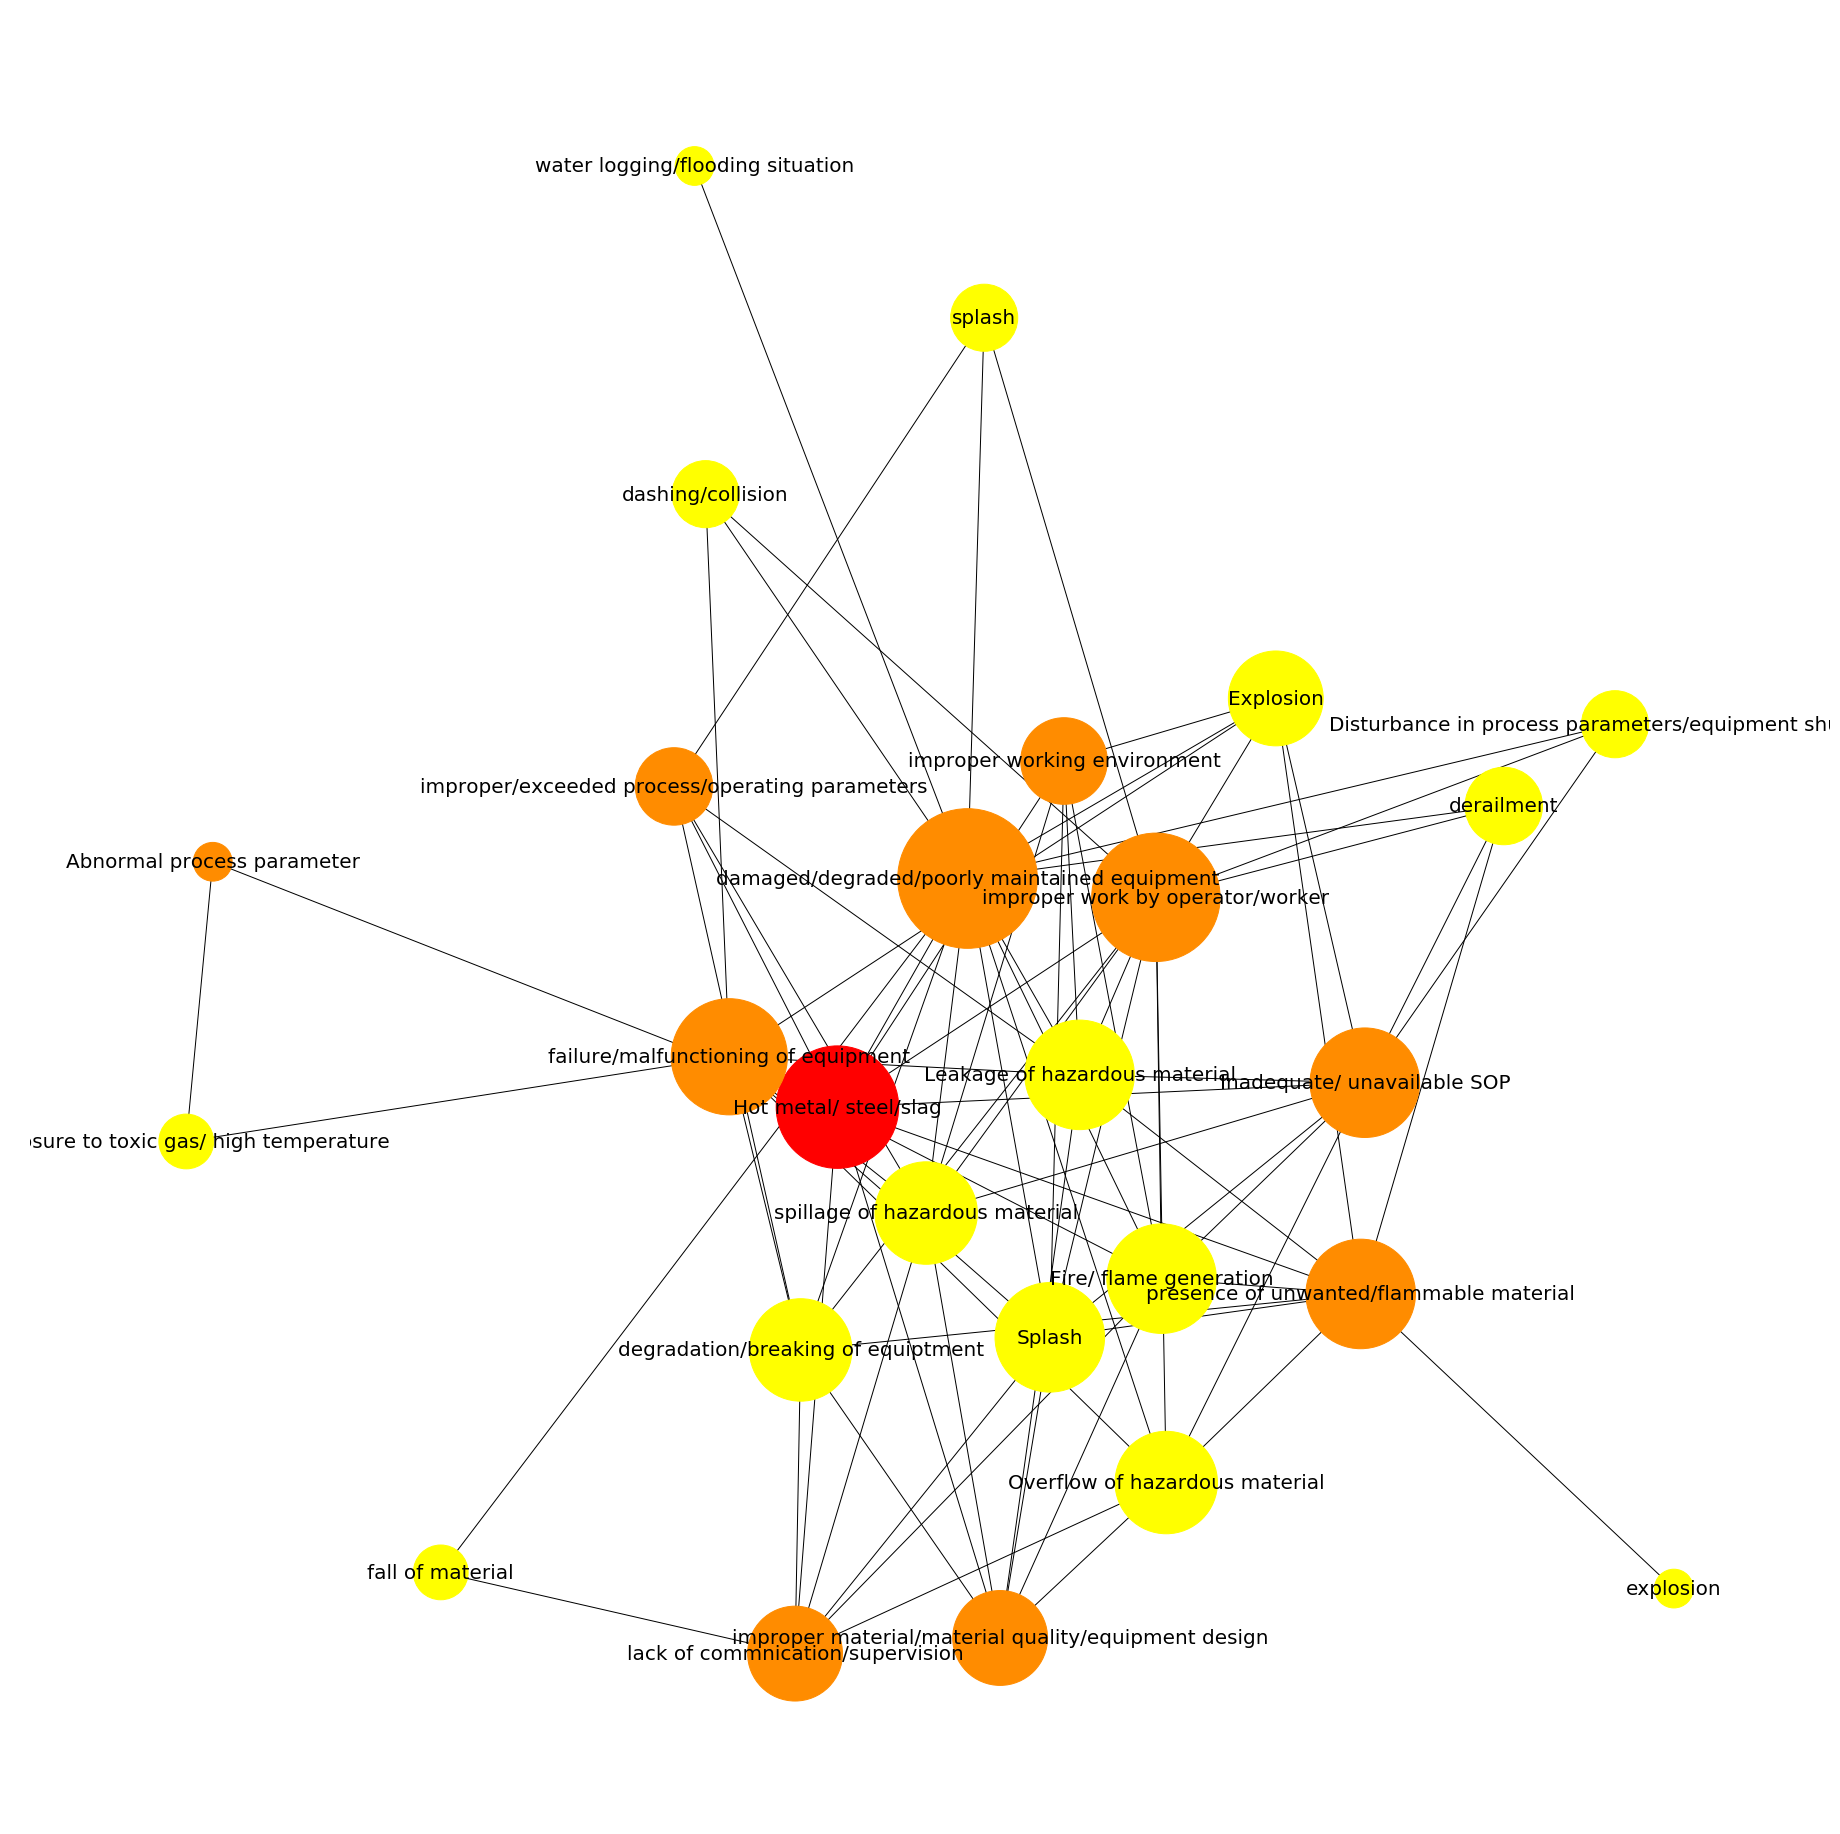

<Figure size 432x288 with 0 Axes>

In [724]:
%matplotlib inline
import pylab
from matplotlib.pyplot import figure
pos=nx.spring_layout(G)
plt.figure(figsize=(25,25))
nx.draw(G,pos, node_size=size,node_color=value, with_labels = True,arrowsize=5, font_size = 20,  arrows = True)
#edge_labels=dict([((u,v,),d['weight'])
                 #for u,v,d in G.edges(data=True)]
plt.show()
#plt.axis('off')
pylab.savefig("foo.png")

#### Word graph

In [53]:
brief_d = pd.read_csv(r'F:\Winter pack\Introduction to Game Development\Project on DA\Projects\Project_3(Concept Map)\result\New folder\Brief Data.csv')
invest_d = pd.read_csv(r'F:\Winter pack\Introduction to Game Development\Project on DA\Projects\Project_3(Concept Map)\result\New folder\invest Data.csv')

In [54]:
for i in brief_d.columns:
    for j in range(len(brief_d[i])):
        brief_d[i].values[j] = brief_d[i].values[j].replace('"', '')
        brief_d[i].values[j] = brief_d[i].values[j].replace(' ', '')

for i in invest_d.columns:
    for j in range(len(invest_d[i])):
        invest_d[i].values[j] = invest_d[i].values[j].replace('"', '')
        invest_d[i].values[j] = invest_d[i].values[j].replace(' ', '')